In [1]:
from chirpInputs import getInputData
import matplotlib.pyplot as plt
import noiseRatio as nr
import numpy as np

## Chirp Input Data

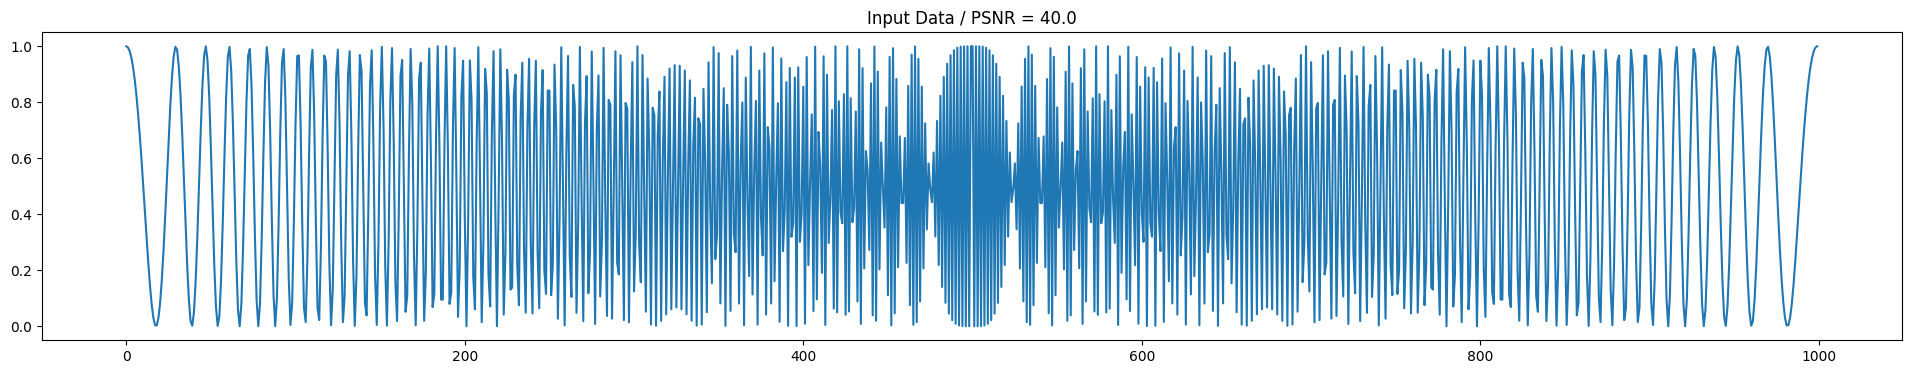

In [17]:
inputData = getInputData()

plt.figure(figsize=(24,4))
plt.title(f"Input Data / PSNR = {nr.PSNR(inputData, inputData)}")
plt.plot(inputData)

## Generate Noise (Salt and Pepper Noise)

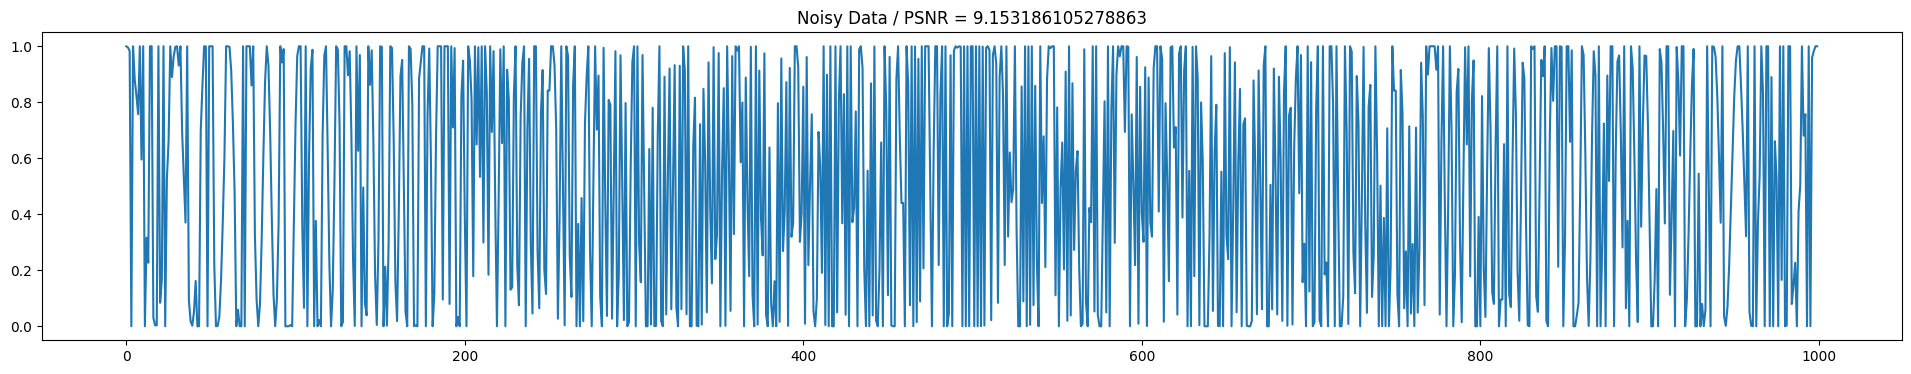

In [3]:
noise = list(np.random.normal(0,1,1000))
for i in range(len(noise)):
    if noise[i] < -1:
        noise[i] = -1
    elif noise[i] > 1:
        noise[i] = 1
    else:
        noise[i] = 0

noisyData = [0 if noise[i]==-1 else 1 if noise[i]==1 else inputData[i] for i in range(len(inputData))]
plt.figure(figsize=(24,4))
plt.title(f"Noisy Data / PSNR = {nr.PSNR(inputData, noisyData)}")
plt.plot(noisyData)


## Moving Average Filter

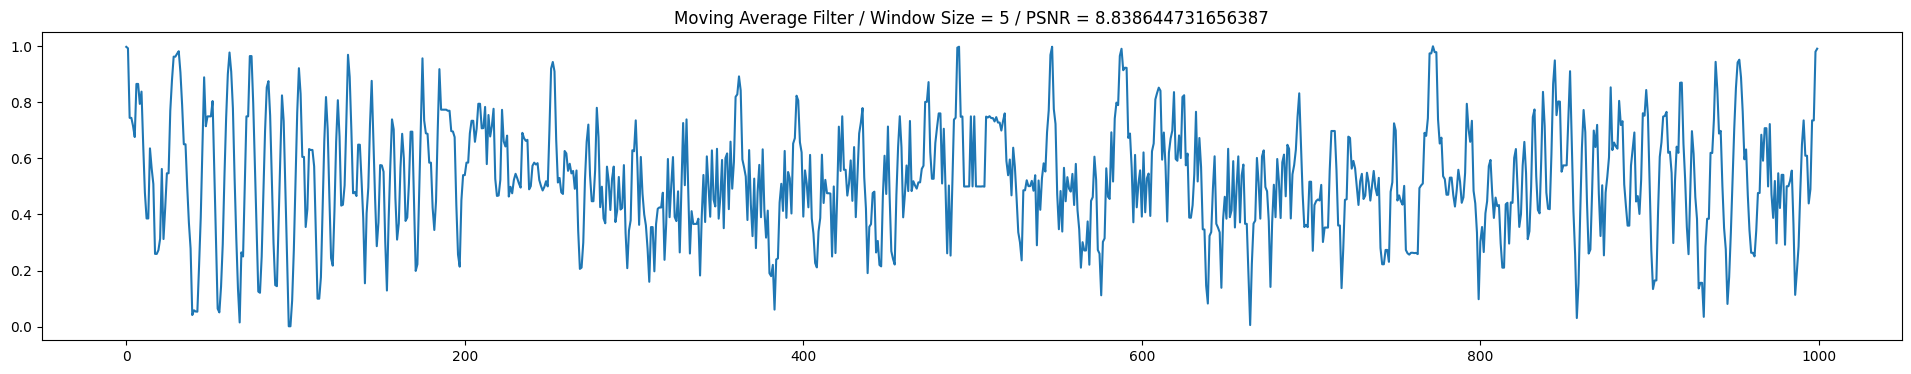

In [18]:
k = 5
MvAvg = []
for i in range(len(inputData)):
    s, e = i-(k//2), i+(k//2)
    s, e = s if s>0 else 0, e if e<len(inputData) else len(inputData)-1
    window = noisyData[s:e]
    MvAvg.append(sum(window)/len(window))
plt.figure(figsize=(24,4))
plt.title(f"Moving Average Filter / Window Size = {k} / PSNR = {nr.PSNR(inputData, MvAvg)}")
plt.plot(MvAvg)

## Median Filter


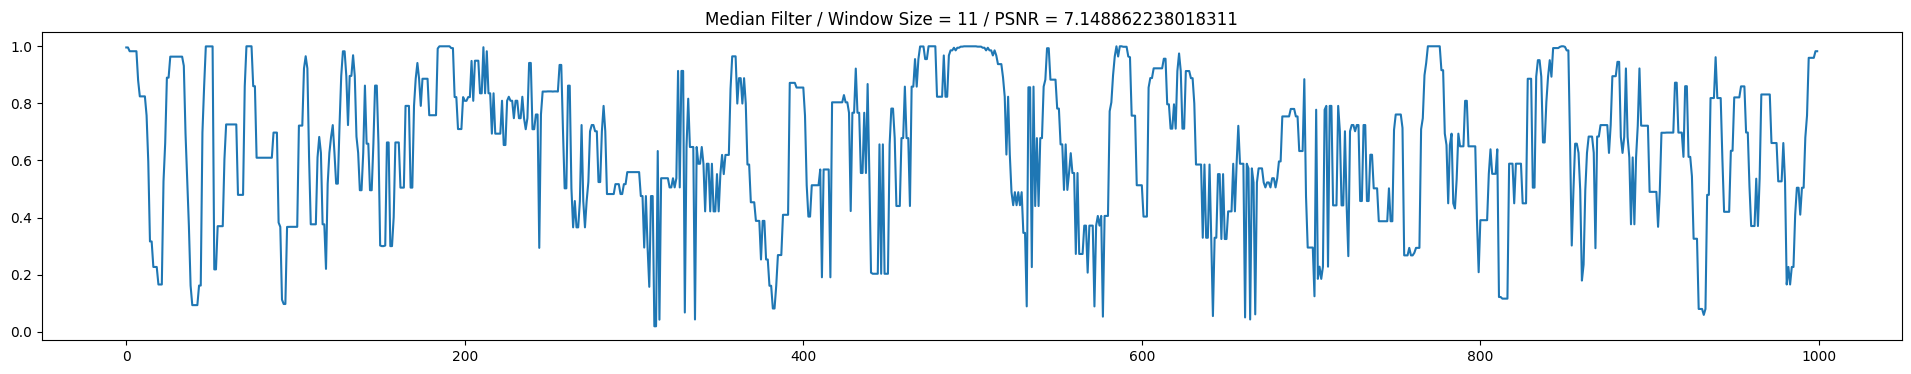

In [19]:
k = 11
Med = []
for i in range(len(inputData)):
    s, e = i-(k//2), i+(k//2)
    s, e = s if s>0 else 0, e if e<len(inputData) else len(inputData)-1
    window = noisyData[s:e]
    Med.append(sorted(window)[len(window)//2])
plt.figure(figsize=(24,4))
plt.title(f"Median Filter / Window Size = {k} / PSNR = {nr.PSNR(inputData, Med)}")
plt.plot(Med)

## Adaptive Median Filter

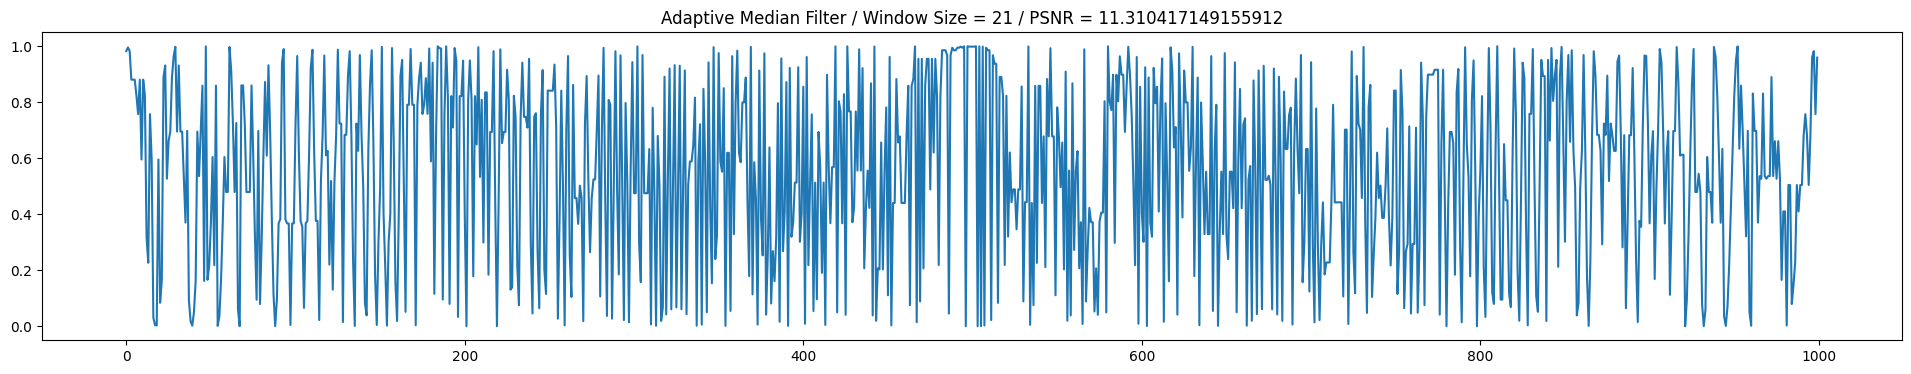

In [38]:
k = 21
AdaMed = []
for i in range(len(inputData)):
    AdaMed.append(noisyData[i])
    for h in range(3, k+1, 2):
        s, e = i-(h//2), i+(h//2)
        s, e = s if s>0 else 0, e if e<len(inputData) else len(inputData)-1
        window = noisyData[s:e]
        tmin = min(window)
        tmax = max(window)
        tmed = sorted(window)[len(window)//2]

        if tmin < tmed and tmed < tmax:
            if tmin < noisyData[i] and noisyData[i]<tmax:
                AdaMed[i] = noisyData[i]
            else:
                AdaMed[i] = tmed
        if h>k:
            AdaMed[i] = tmed
        
plt.figure(figsize=(24,4))
plt.title(f"Adaptive Median Filter / Window Size = {k} / PSNR = {nr.PSNR(inputData, AdaMed)}")
plt.plot(AdaMed)